# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting. **Also** make sure to turn in your homework on Moodle (so we have a backup copy).



In [1]:
"""
Name: Sagnik
HW Group Number: 32 
"""

'\nName: Sagnik\nHW Group Number: 32 \n'

# Homework 1: Problem 4: PCA


## Import all necessary libraries

In [2]:
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets

# we will also be using the PCA library from scikit learn for this exercise
from sklearn.decomposition import PCA

# we will use the StandardScaler method to z-score normalize our data
from sklearn.preprocessing import StandardScaler

# Remember you have to run this cell block before continuing!

## Loading data

In [3]:
# let's load the Wine dataset and z-score normalize each column.
# The dataset has 13 features and 178 data points.
wine_sk = datasets.load_wine(as_frame=True)
# z-score normalize the data using StandardScaler method from sklearn.preprocessing
wine = pd.DataFrame(StandardScaler().fit_transform(wine_sk.data), columns = wine_sk.feature_names)
# the nominal variable identifying the type of wine is stored in wine_type_for_each_datapoint variable
# we'll use this variable for plotting later. 
wine_type_for_each_datapoint = wine_sk.target

wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## Examples

You can perform PCA in python using the scikit-learn library. Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use PCA. 

In [4]:
# let's use a toy dataset to demonstrate PCA. We are using the iris dataset from sklearn.datasets as our toy dataset.
# We will apply PCA on it and extract the first two principal components. 
# While there are ways to directly extract the principal components using the sklearn methods, for the purpose 
# of this exercise, we will first extract the eigen vectors and then calculate the principal components from these eigen vectors. 

# first, load and z-score normalize the data
toy_dataset_sk = datasets.load_iris(as_frame=True)
toy_dataset = pd.DataFrame(StandardScaler().fit_transform(toy_dataset_sk.data), columns = toy_dataset_sk.feature_names)

# Display the dataset for your reference
# note that you can use the display() method to display your pandas dataframe in Jupyter
#display(toy_dataset)

# apply PCA on the toy dataset and extract the eigen vectors of the first two principal components
toy_pca = PCA(n_components = 2).fit(toy_dataset)
toy_eigen_vectors = toy_pca.components_

# now extract the first two principal components
# Recall from class material how to do this.  
# Take a look at matrix multiplication using numpy here: 
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
toy_principal_components = np.matmul(toy_dataset.values , toy_eigen_vectors.T)


In [5]:
# Explore the outputs of the eigen vectors and principal components to gain a better understanding
# Explore other outputs...
toy_eigen_vectors

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## Problem 4.1: Extracting Eigen Vectors

In [6]:
# Problem 1
def principal_component_analysis(data, n_components):
    """
    Input: 
          data: Data frame with M numeric attributes.
          n_components: the number of principal components to calculate 
                        (e.g. 2 for two principal components)
    Output:
          a numpy array of floating point numbers of shape (n_components, M), 
          containing the first n_components eigen vectors.
            
    """
    toy_pca = PCA(n_components = n_components).fit(data)
    return toy_pca.components_

In [7]:
# Test your function!
# note that you can convert your pandas data frame into a numpy matrix by using the dataframe.values property
eigen_vectors = principal_component_analysis(wine.values, 2)
# Each of the 2 eigen vectors should have a value/weight for each of the original 13 attributes
eigen_vectors.shape

(2, 13)

In [8]:
assert principal_component_analysis(wine.values, 2).shape == (2, 13)
np.testing.assert_almost_equal(principal_component_analysis(wine.values, 2)[0, :], np.array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223]))

## Problem 4.2: Calculating Principal Components from Eigen Vectors

In [9]:
# Problem 2
def principal_component_calculation(data, component_weights):
    """
    Input: 
          data: A data frame with N rows and M numeric attributes (e.g. 178 x 13). 
          component_weights: a numpy array of shape (n_components, M) containing the weights (eigen vector) of 
          the first n_components principal components 
          (i.e. the output from running principal_component_analysis from problem 1)
    Output:
          a numpy array of shape (N, n_components) ontaining the n_components principal components,
          calculated for each of the N rows in data.
    Hint: Can you solve this with matrix multiplication? Check out the np.matmul function.
    """
    return np.matmul(data , component_weights.T)


In [10]:
# Test your function

# note that eigen_vectors are the eigen vectors you calculated earlier using principal_component_analysis. 
# We're calculating it again here for ease of use
eigen_vectors = principal_component_analysis(wine.values, 2)
principal_component_values = principal_component_calculation(wine.values, eigen_vectors)
print(f'Principal components are = {principal_component_values} and their shape is {principal_component_values.shape}')

Principal components are = [[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]
 [ 3.47973668 -1.30233324]
 [ 1.7547529  -0.61197723]
 [ 2.11346234 -0.67570634]
 [ 3.45815682 -1.13062988]
 [ 4.31278391 -2.09597558]
 [ 2.3051882  -1.66255173]
 [ 2.17195527 -2.32730534]
 [ 1.89897118 -1.63136888]
 [ 3.54198508 -2.51834367]
 [ 2.0845222  -1.06113799]
 [ 3.12440254 -0.78689711]
 [ 1.08657007 -0.24174355]
 [ 2.53522408  0.09184062]
 [ 1.64498834  0.51627893]
 [ 1.76157587  0.31714893]
 [ 0.9900791  -0.94066734]
 [ 1.77527763 -0.68617513]
 [ 1.23542396  0.08980704]
 [ 2.18840633 -0.68956962]
 [ 2.25610898 -0.19146194]
 [ 2.50022003 -1.24083383]
 [ 2.67741105 -1.47187365]
 [ 1.62857912 -0.05270445]
 [ 1.90269086 -1.63306043]
 [ 1.41038853 -0.69793432]
 [ 1.90382623 -0.17671095]
 

In [11]:
test_eigen_vectors = principal_component_analysis(wine.values, 2)
test_pc = principal_component_calculation(wine.values, test_eigen_vectors)
assert test_pc.shape == (wine.values.shape[0], 2)
np.testing.assert_almost_equal(test_pc[0, :],[ 3.31675081, -1.44346263] )

## Problem 4.3: Visualize your results

You've gained familiarity with matplotlib in HW0. Now use matplotlib to

a) generate a plot with the first principal component on x-axis, second principal component on y-axis. 

b) Assign color to each data point according to the type of wine. You can do this using the wine_type_for_each_datapoint variable.  

***Hint 1:*** Take a look at the [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function. Pay close attention to the 'c' variable. 

c) Name the x-axis as "PC1", y-axis as "PC2"

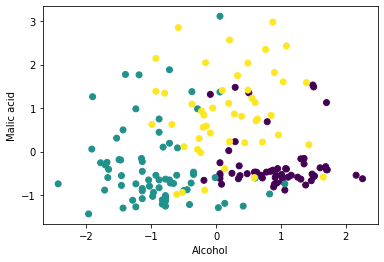

In [12]:
# This is an example of a scatter plot, using the alcohol and malic_acid attributes
plt.scatter(wine.values[:, 0], wine.values[:, 1], c=wine_type_for_each_datapoint)
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")
plt.show()

# How well does this plot separate the 3 differnt types of wine?

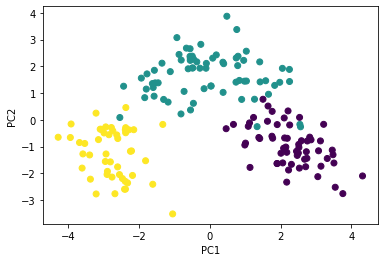

In [16]:
# Problem 3 (see question above)

# recalculating eigen vectors and principal components for ease of use
eigen_vectors = principal_component_analysis(wine.values, 2)
principal_component_values = principal_component_calculation(wine.values, eigen_vectors)

plt.scatter(principal_component_values[:, 0], principal_component_values[:, 1], c=wine_type_for_each_datapoint)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub and Moodle.